The Cholesky Decomposition exists when a matrix is hermitian and positive-definite. It expresses the matrix $\mathbf{A}$ as:

\begin{equation}
\mathbf{A} = \mathbf{L}\mathbf{L^\dagger}
\end{equation}

Where $\mathbf{L}$ is a lower-triangular matrix with positive, real diagonal entries. When $\mathbf{A}$ is real, then so is $\mathbf{L}$. The Cholesky decomposition enables fast solution of a linear system, but it can also be used to create correlated random variables in Monte Carlo simulations. 

### Creating Correlated Random Variables
Let $\mathbf{u}_t$ be a vector of uncorrelated samples with unit standard deviation. If the covariance matrix of the system to be simulated is  $\mathbf{\Sigma}$ with Cholesky decomposition $\mathbf{\Sigma} = \mathbf{LL}^\dagger$, then the vector $\mathbf{v}_t = \mathbf{Lu}_t$ has the desired covariance.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed = 42

T = 10000
n = 5

M = np.random.randn(*(n,n))
Covar = np.matmul(M.T,M) # random symmetric matrix

L = np.linalg.cholesky(Covar)

print('covar:\n',Covar)
print('L:\n',L)
print('L*L^T:\n',np.matmul(L,L.T))
print('covar - L*L^T = 0',np.allclose(np.matmul(L,L.T)-Covar,0))

covar:
 [[ 5.83329982 -2.7988554  -1.221951    0.1995683   2.31184273]
 [-2.7988554  12.06818258  1.35675522 -0.99876349 -4.46688883]
 [-1.221951    1.35675522  2.52907446 -2.10538897  1.58002341]
 [ 0.1995683  -0.99876349 -2.10538897  3.50034403 -2.21280123]
 [ 2.31184273 -4.46688883  1.58002341 -2.21280123  5.34210571]]
L:
 [[ 2.41522252  0.          0.          0.          0.        ]
 [-1.15883956  3.27494633  0.          0.          0.        ]
 [-0.50593723  0.23525733  1.4892132   0.          0.        ]
 [ 0.08262936 -0.27573255 -1.34212858  1.27129023  0.        ]
 [ 0.95719658 -1.02525392  1.54813515 -0.39077877  0.90846262]]
L*L^T:
 [[ 5.83329982 -2.7988554  -1.221951    0.1995683   2.31184273]
 [-2.7988554  12.06818258  1.35675522 -0.99876349 -4.46688883]
 [-1.221951    1.35675522  2.52907446 -2.10538897  1.58002341]
 [ 0.1995683  -0.99876349 -2.10538897  3.50034403 -2.21280123]
 [ 2.31184273 -4.46688883  1.58002341 -2.21280123  5.34210571]]
covar - L*L^T = 0 True


In [2]:
u = np.random.randn(*(n,T))
v = np.matmul(L,u)

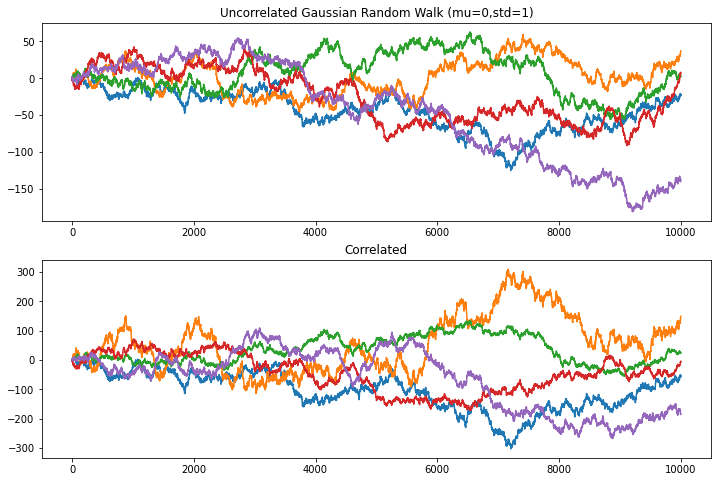

In [3]:
fig, ax = plt.subplots(2,1,figsize=(12,8)) 
for i in range(n):
    ax[0].plot(np.cumsum(u[i],axis=0))
    ax[1].plot(np.cumsum(v[i],axis=0))
    
ax[0].set_title('Uncorrelated Gaussian Random Walk (mu=0,std=1)')
ax[1].set_title('Correlated')

plt.savefig('img/cholesky1.png')

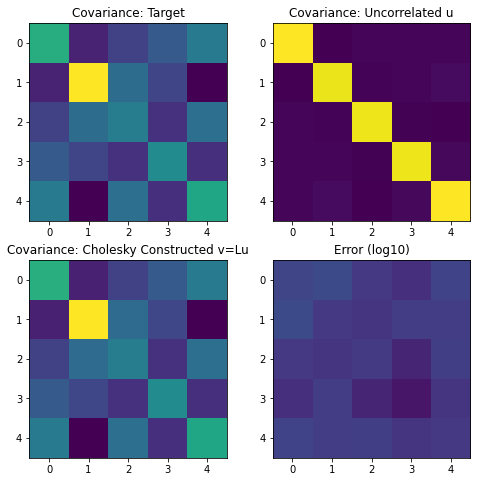

In [4]:
fig, ax = plt.subplots(2,2,figsize=(8,8))


ax[0][0].imshow(Covar,vmin=np.min(Covar),vmax=np.max(Covar))
ax[0][0].set_title('Covariance: Target')
ax[0][1].imshow(np.cov(u))
ax[0][1].set_title('Covariance: Uncorrelated u')
ax[1][0].imshow(np.cov(v),vmin=np.min(Covar),vmax=np.max(Covar))
ax[1][0].set_title('Covariance: Cholesky Constructed v=Lu')
ax[1][1].imshow(np.log10(np.abs(Covar-np.cov(v))),vmin=np.min(Covar),vmax=np.max(Covar))
ax[1][1].set_title('Error (log10)')

plt.savefig('img/cholesky2.png')